# MOHAMMEDI Amira 
---

M2 : HPC     
USTHB
2023        


<div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 1px; color:#EFEAE4; font-size:150%; padding:10px; background:green; border-radius: 10px; box-shadow: 10px 10px 5px #EFEAE4;">
    Dans ce lab <br>
</div>

- <a href="#1" style="text-decoration: none; color:#708D81; font-weight: bold;"> INTRODUCTION</a>
- <a href="#2" style="text-decoration: none; color:#A5C8B4; font-weight: bold;">1. Chargez les fichiers CSV dans des DataFrames</a>
- <a href="#3" style="text-decoration: none; color:#D3E4CD; font-weight: bold;">2. Data Cleaning and Preprocessing</a>
- <a href="#6" style="text-decoration: none; color:#00A57E; font-weight: bold;">3. ANALYSE DES DONNÉES</a>
- <a href="#5" style="text-decoration: none; color:green; font-weight: bold;">4. Modélisation des Données</a>
- <a href="#6" style="text-decoration: none; color:#708D81; font-weight: bold;"> Conclusion</a>

<a id="1"></a>
 

# <div style="color:white;display:fill;border-radius:5px;background-color:green ;overflow:hidden;box-shadow:10px 10px 5px #EFEAE4;"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:centerborder-radius: 10px; ">Introduction</p></div>

🌍La société pharmaceutique HealthCareSolutions, basée au Brésil, emploie environ 4 000 personnes.
Cependant, elle connaît chaque année un turnover d'environ 15% de ses salariés, ce qui nécessite
de trouver des profils similaires sur le marché du travail.
La direction estime que ce niveau de chiffre d'affaires n'est pas bénéfique pour l'entreprise car :
➔ Les projets portés par les salariés qui quittent l’entreprise sont retardés, ce qui impacte négativement la réputation
de l’entreprise auprès des clients et partenaires.
➔ Un service des ressources humaines important doit être maintenu pour rechercher activement des recrues.
➔ Du temps est perdu à l'arrivée de nouveaux collaborateurs car ils ont souvent besoin de formation et de temps pour
devenir pleinement opérationnels dans leur nouvel environnement.

In [1]:
 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# <div style="color:white;display:fill;border-radius:5px;background-color:green;overflow:hidden;box-shadow:10px 10px 5px #EFEAE4;"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Chargez les fichiers CSV dans des DataFrames</p></div>

## <b><span style='color:green'>1.1</span> |  Vérifier les statistiques descriptives</b>
 

In [2]:

df_general = pd.read_csv('general_data.csv')
df_manager_survey= pd.read_csv('manager_survey_data.csv')
df_employee_survey = pd.read_csv('employee_survey_data.csv')
df_in_time = pd.read_csv('in_time.csv')
df_out_time = pd.read_csv('out_time.csv')



🔧 df_general

In [3]:

df_general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
df_general.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


🔧 manager_survey

In [5]:
df_manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [6]:
df_manager_survey.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


🔧 df_employee_survey

In [7]:
df_employee_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [8]:
df_employee_survey.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


🔧 df_in_time et  df_out_time

In [9]:
df_in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [10]:
df_out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


 
## <b><span style='color:green'>1.2</span> | Vérifier les informations sur les types de données et les valeurs manquantes</b>

In [11]:
df_out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [12]:
df_in_time.isna().sum().sum()

109080

In [13]:
df_in_time.isna().sum().sum()

109080

In [14]:
df_in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [15]:
df_in_time.isna().sum().sum()

109080

In [16]:
df_in_time.isna().sum()

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

In [17]:
df_employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [18]:
df_employee_survey.isna().sum().sum()

83

In [19]:
df_manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [20]:
df_manager_survey.isna().sum().sum()

0

In [21]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [22]:
df_general.isna().sum().sum()

28

In [23]:
df_general['Attrition'].value_counts()


Attrition
No     3699
Yes     711
Name: count, dtype: int64

In [24]:
df_general['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64

In [25]:
df_general['Department'].value_counts()

Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64

In [26]:
df_general['EducationField'].value_counts()

EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64

In [27]:
df_general['Gender'].value_counts()

Gender
Male      2646
Female    1764
Name: count, dtype: int64

In [28]:
df_general['MaritalStatus'].value_counts()

MaritalStatus
Married     2019
Single      1410
Divorced     981
Name: count, dtype: int64


# <div style="color:white;display:fill;border-radius:5px;background-color:green;overflow:hidden;box-shadow:10px 10px 5px #EFEAE4;"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Data Cleaning and Preprocessing</p></div>

 ## <b><span style='color:green'>2.1</span> | data_in_time data_out_time</b>

🔧  Renommer la première colonne en "EmployeeID"

In [29]:
df_in_time = pd.read_csv('in_time.csv')
df_out_time = pd.read_csv('out_time.csv')

In [3]:
 
df_in_time = df_in_time.rename(columns={df_in_time.columns[0]: 'EmployeeID'})
 
df_out_time = df_out_time.rename(columns={df_out_time.columns[0]: 'EmployeeID'})

In [7]:
df_in_time.isna().sum()

EmployeeID       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

In [8]:
df_out_time.isna().sum()

EmployeeID       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

📈 Les valeurs NaN représentent les absences des employés. Elles ne doivent donc pas être remplacées, mais peuvent être utilisées pour créer une nouvelle métrique.


Nous pouvons également remarquer que tous les employés sont absents certains jours, comme le 1er janvier. Si personne ne travaille pendant un jour férié, nous pouvons supprimer ce jour du dataset.



🔧  Remplacer les NaN par une valeur spécifique 

In [4]:
df_in_time = df_in_time.fillna(0)
df_out_time = df_out_time.fillna(0)

In [79]:
df_out_time.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,0.0,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,0,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,0.0,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,0.0,2015-01-02 18:22:17,2015-01-05 17:48:22,0,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,0,0.0,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,0.0,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,0.0,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,0.0,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,0.0,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,0.0,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,0.0,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


🔍  Trouvez les colonnes qui sont toutes à 00:00:00

In [5]:
 
colonnes_nulles = []
for colonne in df_in_time:
    if df_in_time[colonne].isin([0.0]).all() == True:
        colonnes_nulles.append(colonne)

 
colonnes_nulles

['2015-01-01',
 '2015-01-14',
 '2015-01-26',
 '2015-03-05',
 '2015-05-01',
 '2015-07-17',
 '2015-09-17',
 '2015-10-02',
 '2015-11-09',
 '2015-11-10',
 '2015-11-11',
 '2015-12-25']

In [36]:
# colonnes_nulles = []
# for colonne in df_out_time:
#     if df_out_time[colonne].isin(["1970-01-01"]).all() == True:
#         colonnes_nulles.append(colonne)

# colonnes_nulles

🧼 Supprimez les colonnes qui sont toutes à 00:00:00

In [6]:
 
df_in_time = df_in_time.drop(colonnes_nulles, axis=1)
df_out_time = df_out_time.drop(colonnes_nulles, axis=1)

🔧 Créez un DataFrame vide et copiez la première colonne du DataFrame original vers le DataFrame vide

In [7]:
df_time= pd.DataFrame()


df_time["EmployeeID"] = df_in_time["EmployeeID"]

🔧 Supprimer la partie date :

In [8]:
df_out_time = df_out_time.applymap(lambda x: str(x).split(' ')[-1])
df_in_time=df_in_time.applymap(lambda x: str(x).split(' ')[-1])

C:\Users\Amira\AppData\Local\Temp\ipykernel_11972\3760550514.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_out_time = df_out_time.applymap(lambda x: str(x).split(' ')[-1])


C:\Users\Amira\AppData\Local\Temp\ipykernel_11972\3760550514.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_in_time=df_in_time.applymap(lambda x: str(x).split(' ')[-1])


In [84]:
df_out_time.head()

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,16:56:15,17:20:11,17:19:05,16:34:55,17:08:32,17:38:29,16:58:39,18:02:58,17:22:13,...,0,0,17:15:50,17:27:51,16:44:44,17:47:22,18:00:07,17:22:30,17:40:56,17:17:33
1,2,18:22:17,17:48:22,0,17:09:06,17:34:04,16:52:29,17:36:48,18:00:13,17:14:44,...,17:10:50,18:31:28,17:34:16,18:16:35,17:38:18,0,17:08:38,17:54:46,18:31:35,17:40:58
2,3,16:59:14,17:06:46,16:38:32,16:33:21,17:24:22,16:57:30,17:28:54,17:21:25,17:21:29,...,17:06:23,17:02:23,17:20:17,16:32:50,16:59:43,16:58:25,16:43:31,17:09:56,17:06:25,17:15:50
3,4,17:25:24,17:14:03,17:07:42,16:32:40,16:53:11,17:19:47,17:13:37,17:11:45,16:53:26,...,17:21:57,17:55:23,16:49:09,17:24:00,17:36:35,16:48:21,17:19:34,16:58:16,17:40:11,17:09:14
4,5,18:31:37,17:49:15,17:26:25,17:37:59,17:59:28,17:44:08,18:51:21,18:14:58,18:21:48,...,18:05:47,17:52:48,17:43:35,18:07:57,18:00:49,17:59:22,17:44:59,18:47:00,17:15:33,17:42:14


🔧 Calculer le temps passé au travail pour chaque jour

In [9]:

import numpy as np
 
df_in_time = df_in_time.iloc[:, 1:].apply(pd.to_timedelta)
df_out_time = df_out_time.iloc[:, 1:].apply(pd.to_timedelta)

df_work_hours = df_out_time - df_in_time

moyen_heur = df_work_hours.mean(axis=1)

🎨 Convertir la colonne 'total_hours' en format "hh:mm:ss"

In [10]:
 
import numpy as np
 
 
moyen_heur  = pd.to_timedelta(moyen_heur )

moyen_heur  = moyen_heur .dt.total_seconds().apply(np.floor).astype(int)

moyen_heur  = pd.to_datetime(moyen_heur , unit='s').dt.strftime('%H:%M:%S')
 

In [11]:
moyen_heur

0       06:52:12
1       07:18:57
2       06:48:57
3       06:47:21
4       07:52:39
          ...   
4405    08:19:00
4406    05:53:49
4407    07:08:58
4408    09:11:15
4409    06:30:42
Length: 4410, dtype: object

🔧 Calculer les moyennes des heures de début et de fin

In [12]:
time_arive = df_in_time.iloc[:, 1:].mean(axis=1) 
time_depart = df_out_time.iloc[:, 1:].mean(axis=1) 

In [13]:
time_arive.head()

0   0 days 09:19:00.979838709
1   0 days 09:27:48.237903225
2   0 days 09:44:27.629032258
3   0 days 09:25:04.524193548
4   0 days 09:50:07.153225806
dtype: timedelta64[ns]

🎨 Convertir les colonne  en format "hh:mm:ss"

In [14]:
import numpy as np
 
time_arive  = time_arive.dt.total_seconds().apply(np.floor).astype(int)
time_depart  = time_depart.dt.total_seconds().apply(np.floor).astype(int)

 
time_depart  = pd.to_datetime(time_depart , unit='s').dt.strftime('%H:%M:%S')
time_arive  = pd.to_datetime(time_arive , unit='s').dt.strftime('%H:%M:%S')

In [15]:
time_arive.head() 

0    09:19:00
1    09:27:48
2    09:44:27
3    09:25:04
4    09:50:07
dtype: object

🔧 Calcul des heures de retard ou d'avance 

In [16]:
heure_entree_souhaitee = pd.to_timedelta('08:00:00')   
retard_ou_avance = df_in_time.iloc[:, 1:] - heure_entree_souhaitee
total_heures_retard = retard_ou_avance[retard_ou_avance > pd.Timedelta(0)].sum()

In [17]:
total_heures_retard.head()

2015-01-05   349 days 03:35:20
2015-01-06   349 days 08:11:46
2015-01-07   350 days 00:14:49
2015-01-08   345 days 13:37:58
2015-01-09   349 days 11:48:37
dtype: timedelta64[ns]

🔧 ajouter au df_time les nouvel time calculer :

In [18]:
df_time = pd.concat([df_time,time_arive, time_depart,moyen_heur], axis=1)

In [19]:
df_time.columns

Index(['EmployeeID', 0, 1, 2], dtype='object')

In [20]:
nouveaux_noms_partiels = {0: 'time_arive', 1: 'time_depart',2:'moyen_heur'}
df_time = df_time.rename(columns=nouveaux_noms_partiels)

In [21]:
df_time.columns

Index(['EmployeeID', 'time_arive', 'time_depart', 'moyen_heur'], dtype='object')


 ## <b><span style='color:green'>2.2</span> | Création des Catégories</b>

🔧  Créez de nouvelles variables qui pourraient être plus informatives pour votre analyse.

In [22]:
 
df_general['PromotionCategory'] = df_general['YearsSinceLastPromotion'].apply(lambda x: 'Récente' if x <= 2 else 'Non récente')


In [23]:

df_general['TotalExperienceWithManager'] =df_general['YearsWithCurrManager'] + df_general['YearsAtCompany']


In [24]:

df_general['FrequentTraveler'] = (df_general['BusinessTravel'] == 'Travel_Frequently').astype(int)

In [25]:

df_general['JobLevel_Education'] = df_general['JobLevel'] * df_general['Education']

In [26]:

df_general['TotalYearsWithCurrManager'] = df_general['YearsAtCompany'] - df_general['YearsWithCurrManager']

In [31]:
df_general.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PromotionCategory,TotalExperienceWithManager,FrequentTraveler,JobLevel_Education,TotalYearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,Récente,1,0,2,1
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,Récente,9,1,1,1
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,Récente,8,1,16,2
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,Non récente,13,0,15,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,Récente,10,0,1,2


 ## <b><span style='color:green'>2.3</span> | concatenation et clean data</b>

In [27]:
import pandas as pd
df = pd.merge(df_employee_survey, df_general, on='EmployeeID', how='inner')

df = pd.merge(df, df_manager_survey, on='EmployeeID', how='inner')

df = pd.merge(df, df_time, on='EmployeeID', how='inner')

In [28]:
df.shape

(4410, 37)

In [62]:
df.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'PromotionCategory', 'TotalExperienceWithManager', 'FrequentTraveler',
       'JobLevel_Education', 'TotalYearsWithCurrManager', 'JobInvolvement',
       'PerformanceRating', 'time_arive', 'time_depart', 'moyen_heur'],
      dtype='object')

🔧  Créez de nouvelles variables qui pourraient être plus informatives pour votre analyse.

In [29]:
 
df.drop(['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)


# <div style="color:white;display:fill;border-radius:5px;background-color:green;overflow:hidden;box-shadow:10px 10px 5px #EFEAE4;"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">ANALYSE DES DONNÉES</p></div>

 ## <b><span style='color:green'>3.1</span> | <span  >Analyse df </span></b>

In [35]:
df.shape

(4410, 33)

In [65]:
df[df.duplicated()]

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PromotionCategory,TotalExperienceWithManager,FrequentTraveler,JobLevel_Education,TotalYearsWithCurrManager,JobInvolvement,PerformanceRating,time_arive,time_depart,moyen_heur


In [66]:
#suprimer duplicates 
 
# for i in range(len(df)):
#     df = df.drop_duplicates()

In [67]:
df.isnull().sum()

EnvironmentSatisfaction       25
JobSatisfaction               20
WorkLifeBalance               38
Age                            0
Attrition                      0
BusinessTravel                 0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
Gender                         0
JobLevel                       0
JobRole                        0
MaritalStatus                  0
MonthlyIncome                  0
NumCompaniesWorked            19
PercentSalaryHike              0
StockOptionLevel               0
TotalWorkingYears              9
TrainingTimesLastYear          0
YearsAtCompany                 0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
PromotionCategory              0
TotalExperienceWithManager     0
FrequentTraveler               0
JobLevel_Education             0
TotalYearsWithCurrManager      0
JobInvolvement                 0
PerformanceRating              0
time_arive

In [68]:
df.isna().sum().sum()

111

 🔍  Comme on peut le constater ci-dessus, certaines questions de l'enquête auprès des employés sont restées sans réponse, comme en témoignent les valeurs manquantes (NA) dans le récapitulatif. Il est important de traiter les données manquantes dans les enquêtes car elles peuvent affecter la précision et la représentativité des résultats

In [69]:
import pandas as pd
from datetime import datetime, timedelta

 
df_time['moyen_heur'] = pd.to_timedelta(df_time['moyen_heur'])

 
moyenne_minutes = df_time['moyen_heur'].mean().total_seconds() / 60

 
moyenne_heures = int(moyenne_minutes // 60)
moyenne_minutes_restantes = int(moyenne_minutes % 60)
 
print("Moyenne de la colonne 'moyen_heur':", "{:02}:{:02}".format(moyenne_heures, moyenne_minutes_restantes))



Moyenne de la colonne 'moyen_heur': 07:18


In [70]:
df.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalExperienceWithManager,FrequentTraveler,JobLevel_Education,TotalYearsWithCurrManager,JobInvolvement,PerformanceRating
count,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2.723603,2.728246,2.761436,36.923810,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,...,2.799320,7.008163,2.187755,4.123129,11.131293,0.188435,6.063946,2.885034,2.729932,3.153741
std,1.092756,1.101253,0.706245,9.133301,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,...,1.288978,6.125135,3.221699,3.567327,9.157415,0.391104,4.063902,4.077741,0.711400,0.360742
min,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000
25%,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,...,2.000000,3.000000,0.000000,2.000000,5.000000,0.000000,3.000000,1.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,...,3.000000,5.000000,1.000000,3.000000,8.000000,0.000000,6.000000,1.000000,3.000000,3.000000
75%,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,...,3.000000,9.000000,3.000000,7.000000,16.000000,0.000000,8.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,...,6.000000,40.000000,15.000000,17.000000,50.000000,1.000000,25.000000,34.000000,4.000000,4.000000


In [71]:


df.describe().T.style.background_gradient(cmap = 'Greens')

,count,mean,std,min,25%,50%,75%,max
EnvironmentSatisfaction,4385.000000,2.723603,1.092756,1.000000,2.000000,3.000000,4.000000,4.000000
JobSatisfaction,4390.000000,2.728246,1.101253,1.000000,2.000000,3.000000,4.000000,4.000000
WorkLifeBalance,4372.000000,2.761436,0.706245,1.000000,2.000000,3.000000,3.000000,4.000000
Age,4410.000000,36.923810,9.133301,18.000000,30.000000,36.000000,43.000000,60.000000
DistanceFromHome,4410.000000,9.192517,8.105026,1.000000,2.000000,7.000000,14.000000,29.000000
Education,4410.000000,2.912925,1.023933,1.000000,2.000000,3.000000,4.000000,5.000000
JobLevel,4410.000000,2.063946,1.106689,1.000000,1.000000,2.000000,3.000000,5.000000
MonthlyIncome,4410.000000,65029.312925,47068.888559,10090.000000,29110.000000,49190.000000,83800.000000,199990.000000
NumCompaniesWorked,4391.000000,2.694830,2.498887,0.000000,1.000000,2.000000,4.000000,9.000000
PercentSalaryHike,4410.000000,15.209524,3.659108,11.000000,12.000000,14.000000,18.000000,25.000000


## 📜remarque general:
Les employés sont censés travailler 8 heures par jour, mais en réalité, ils travaillent entre 6 et 11 heures. Il serait intéressant d'étudier les 25 % d'employés qui travaillent le plus. Il pourrait également y avoir une corrélation entre le niveau d'options de stock et le niveau d'emploi. Il serait également intéressant de connaître le montant de la dernière augmentation de salaire de chaque employé. Nous allons commencer par examiner la distribution de l'attrition

 ## <b><span style='color:green'>3.2</span> | <span style="color: lightgreen; font-weight: bold;">Visualistaion </span></b>

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Attrition', ylabel='count'>

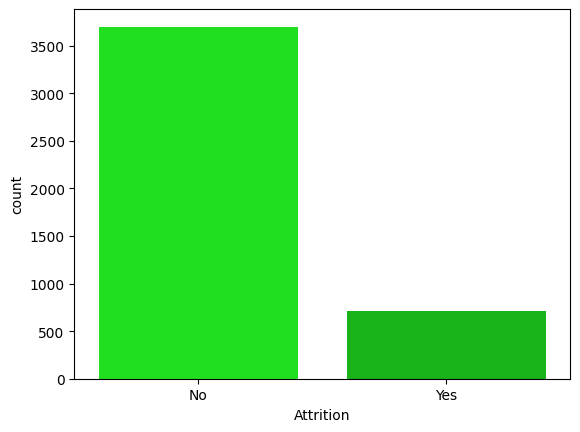

In [72]:
#  vert personnalisé
green_palette = ['#00FF00', '#00CC00', '#009900', '#006600', '#003300']

 
sns.countplot(x='Attrition', data=df, palette=green_palette)

In [108]:
df_general['Attrition'].value_counts()


Attrition
No     3699
Yes     711
Name: count, dtype: int64

In [123]:
# attrition_percentage = df_general['Attrition'].mean() * 100
# attrition_percentage
df_general['Attrition_numeric'] = df_general['Attrition'].map({'Yes': 1, 'No': 0})
attrition_percentage = df_general['Attrition_numeric'].mean() * 100
attrition_percentage

16.122448979591837

🔍 un taux de seulement 16% d'employés ayant quitté l'entreprise dans votre ensemble de données constitue effectivement un déséquilibre de classes important. Cela signifie que la grande majorité des données (84%) appartient à la classe "restants", tandis qu'une petite minorité seulement appartient à la classe "départs".

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

 
def count_plot(nom):
 
    age_bins = range(0, df_general['Age'].max() + 10, 10)
    #green_palette = ['#00FF00', '#00CC00', '#009900', '#006600', '#003300']
    green_palette = ['#00FF00', '#003300', '#003300', '#006600', '#009900']
    plt.figure(figsize=(12, 6))

   
    df_general['Age Group'] = pd.cut(df_general['Age'], bins=age_bins, right=False)

 
    sns.countplot(x=nom, data=df, hue='Attrition', palette=green_palette)

    plt.title('Distribution of Age Groups with Attrition')
    plt.xlabel(nom)
    plt.ylabel('Count')

    
    plt.show()


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

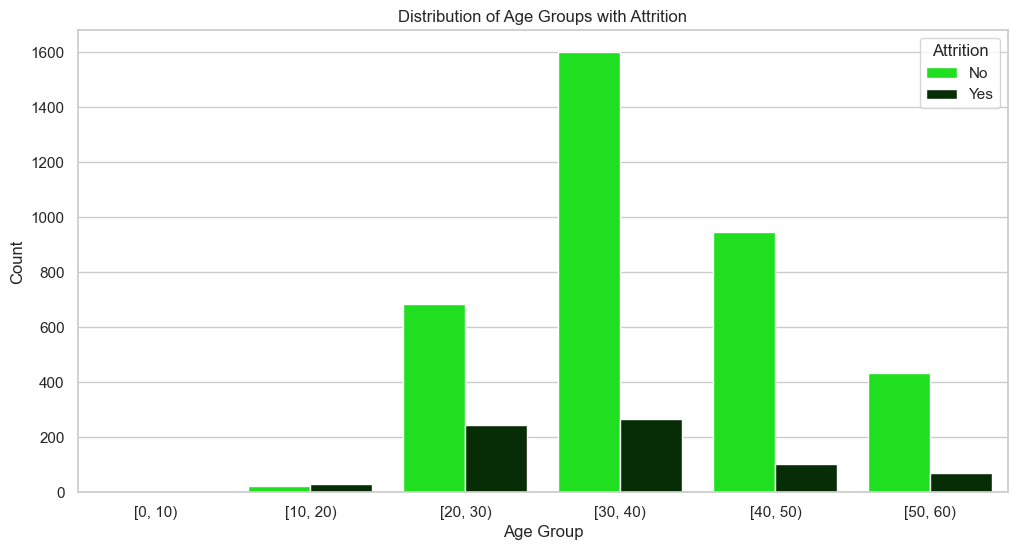

In [ ]:
count_plot('Age')

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

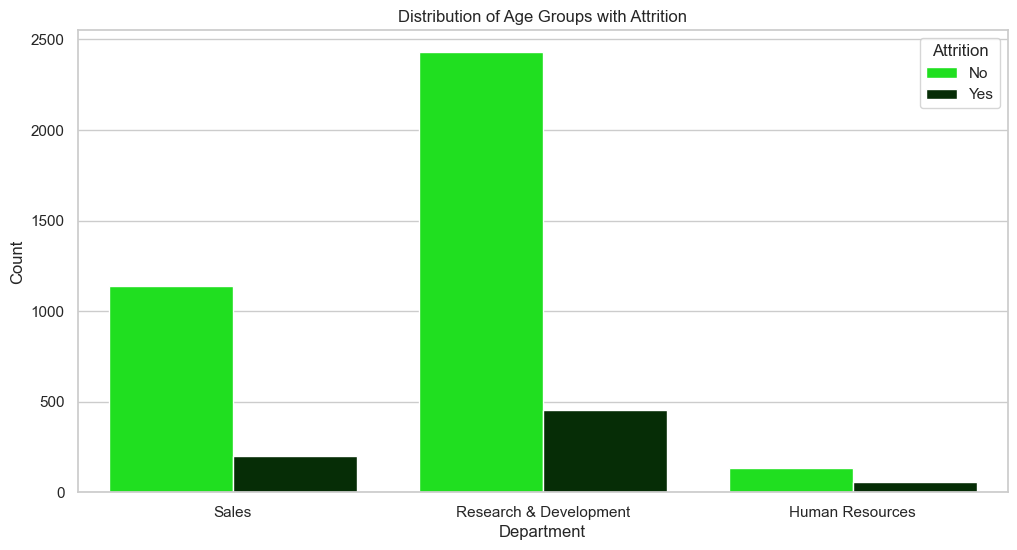

In [ ]:
count_plot('Department')

🔍 Le taux d'attrition des employés du service des ressources humaines est nettement plus élevé que celui des autres départements.

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

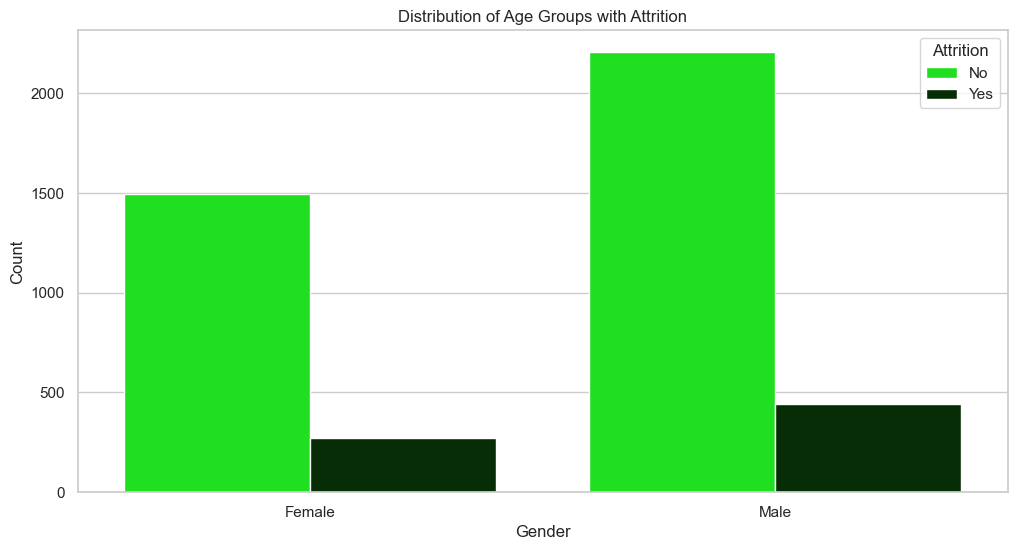

In [ ]:
count_plot('Gender')

🔍 Les données suggèrent une absence d'influence significative du genre sur le taux de départ des employés.

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

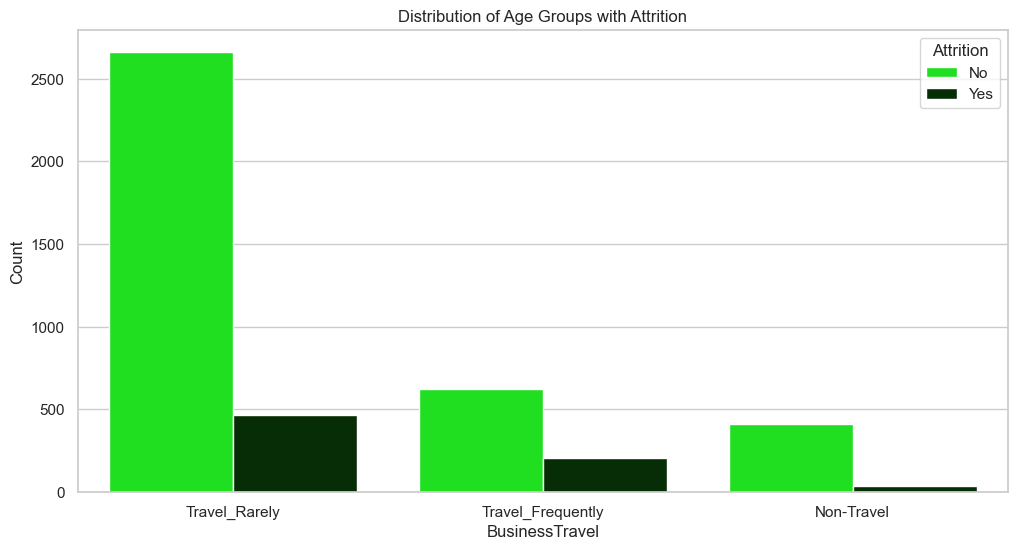

In [ ]:
count_plot('BusinessTravel')

🔍 On constate une tendance nette : les employés qui voyagent très fréquemment ont un taux de départ plus élevé que ceux qui ne voyagent pas.

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

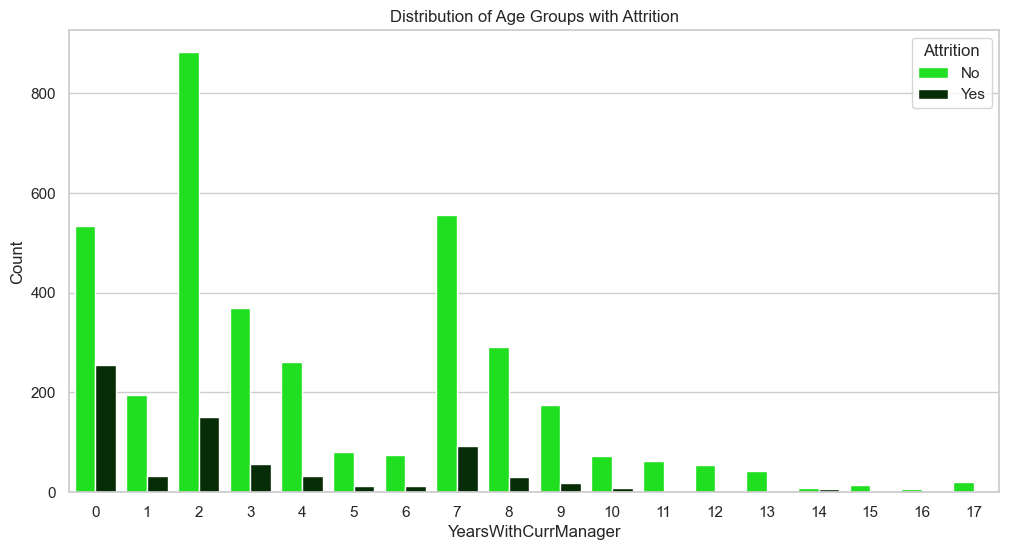

In [ ]:
count_plot( 'YearsWithCurrManager')

🔍 L'influence du nombre d'années d'ancienneté sur l'attrition n'est pas statistiquement claire. Cependant, une observation majoritaire suggère que les employés ayant moins d'ancienneté tendent à avoir un taux de départ plus élevé.

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

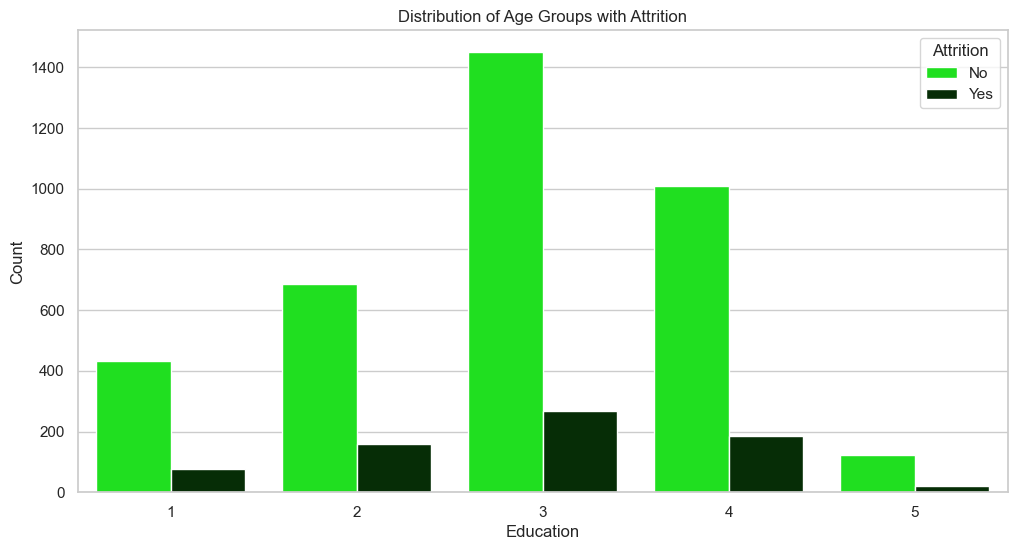

In [ ]:
count_plot('Education')

🔍 Nos analyses indiquent que le niveau d'éducation des employés n'est pas directement lié à leur taux de départ.

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

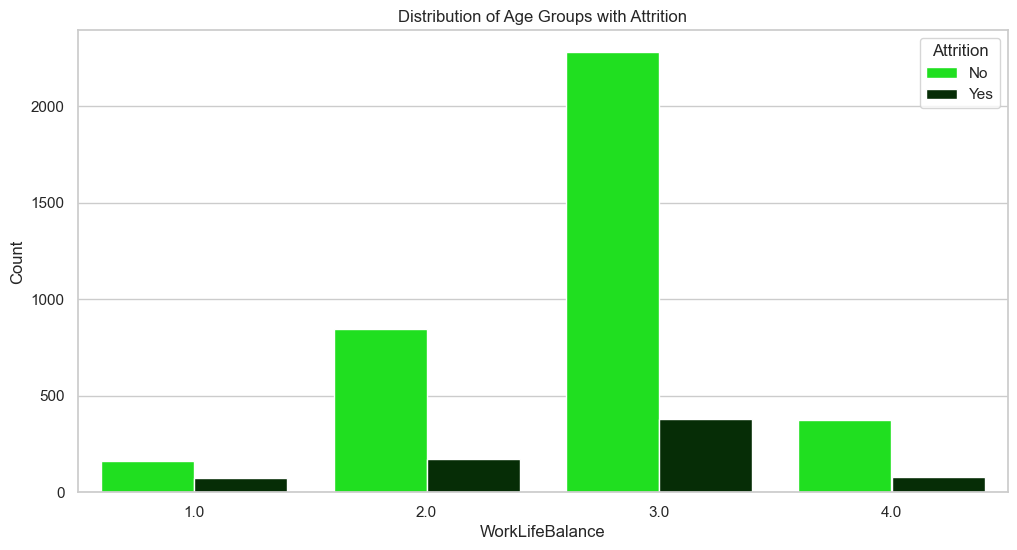

In [ ]:
count_plot('WorkLifeBalance')

🔍 Les employés ayant un très mauvais équilibre entre vie professionnelle et vie personnelle sont plus enclins à partir.

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

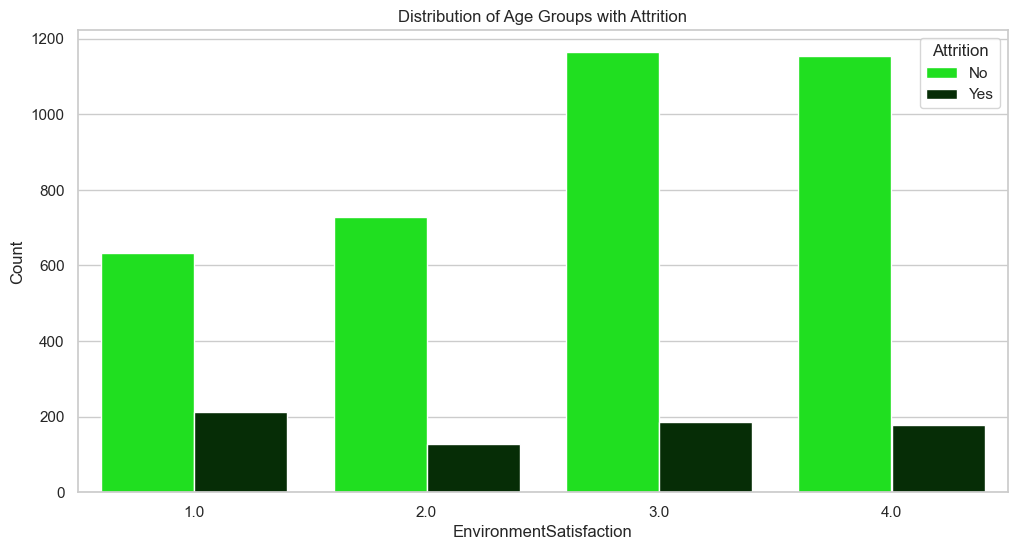

In [ ]:
count_plot ('EnvironmentSatisfaction')

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

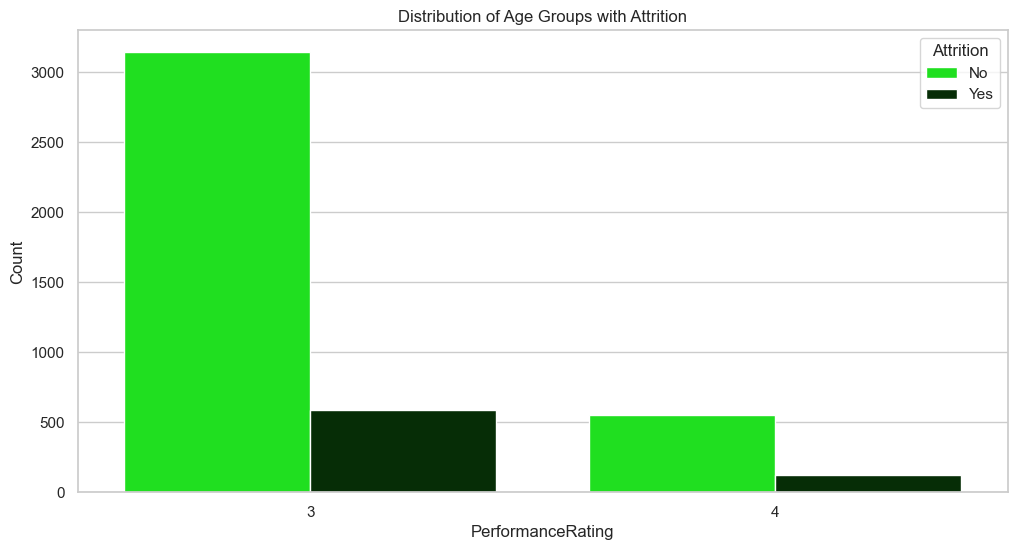

In [ ]:
count_plot('PerformanceRating')

📊 des employés ayant quitté l'entreprise avaient une excellente évaluation de performance


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='TotalWorkingYears'>

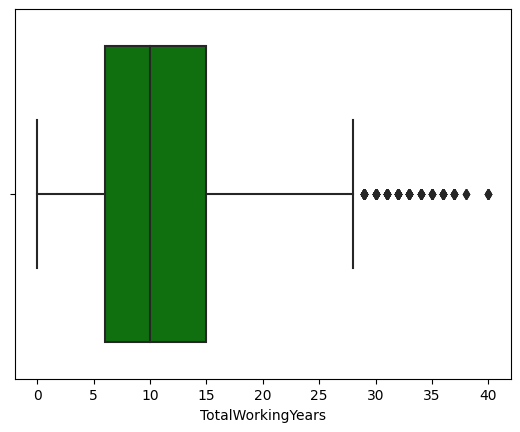

In [ ]:
sns.boxplot(x='TotalWorkingYears',data=df,color='Green')

📊 Après analyse, nous avons choisi la médiane de 10 comme valeur acceptée pour le champ "TotalWorkingYears". Cette décision a été prise car la médiane est une mesure plus robuste que la moyenne face aux valeurs aberrantes, et que le champ doit contenir un nombre entier.

 ## <b><span style='color:green'>3.3</span> | <span style="color: lightgreen; font-weight: bold;">Transformation des Variables</span></b>

🔧  Obtenir les noms des colonnes catégoriques sous forme de liste

In [ ]:
categorical_cols = df.select_dtypes(include=['object'])

In [ ]:
categorical_cols.columns.to_list()

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'PromotionCategory',
 'time_arive',
 'time_depart',
 'moyen_heur']

📜 Encodage des variables catégoriques :

In [30]:
business_travel_mapping = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
df['BusinessTravel'] = df['BusinessTravel'].map(business_travel_mapping)
 
marital_status_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2}
df['MaritalStatus'] = df['MaritalStatus'].map(marital_status_mapping)
 
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

 
job_role_mapping = {
    'Sales Executive': 0,
    'Research Scientist': 1,
    'Laboratory Technician': 2,
    'Manufacturing Director': 3,
    'Healthcare Representative': 4,
    'Manager': 5,
    'Sales Representative': 6,
    'Research Director': 7,
    'Human Resources': 8
}
df['JobRole'] = df['JobRole'].map(job_role_mapping)

 
# over_18_mapping = {'Y': 1, 'N': 0}
# df['Over18'] = df['Over18'].map(over_18_mapping)

education_field_mapping = {
    'Life Sciences': 0,
    'Medical': 1,
    'Marketing': 2,
    'Technical Degree': 3,
    'Other': 4,
    'Human Resources': 5
}
df['EducationField'] = df['EducationField'].map(education_field_mapping)


department_mapping = {
    'Sales': 0,
    'Research & Development': 1,
    'Human Resources': 2
}
df['Department'] = df['Department'].map(department_mapping)


attrition_mapping = {'Yes': 1, 'No': 0}
df['Attrition'] = df['Attrition'].map(attrition_mapping)

import pandas as pd

 
df['PromotionCategory'] = df['PromotionCategory'].map({'Récente': 1, 'Non récente': 0})


In [37]:
df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PromotionCategory,TotalExperienceWithManager,FrequentTraveler,JobLevel_Education,TotalYearsWithCurrManager,JobInvolvement,PerformanceRating,time_arive,time_depart,moyen_heur
0,3.0,4.0,2.0,51,0,1,0,6,2,0,...,1,1,0,2,1,3,3,09:19:00,16:11:08,06:52:12
1,3.0,2.0,4.0,31,1,2,1,10,1,0,...,1,9,1,1,1,2,4,09:27:48,16:46:34,07:18:57
2,2.0,2.0,1.0,32,0,2,1,17,4,4,...,1,8,1,16,2,3,3,09:44:27,16:33:27,06:48:57
3,4.0,4.0,3.0,38,0,0,1,2,5,0,...,0,13,0,15,3,2,3,09:25:04,16:12:17,06:47:21
4,4.0,1.0,3.0,32,0,1,1,10,1,1,...,1,10,0,1,2,3,3,09:50:07,17:42:43,07:52:39


In [ ]:
df.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'PromotionCategory', 'TotalExperienceWithManager', 'FrequentTraveler',
       'JobLevel_Education', 'TotalYearsWithCurrManager', 'JobInvolvement',
       'PerformanceRating', 'time_arive', 'time_depart', 'moyen_heur'],
      dtype='object')

📜 Convertissez les valeurs de 'time' en minutes et la colonne 'time' soit au format HH:MM:SS

In [31]:
import pandas as pd
df['time_arive'] = pd.to_timedelta(df['time_arive']).dt.total_seconds() / 60.0

df['time_depart'] = pd.to_timedelta(df['time_depart']).dt.total_seconds() / 60.0
df['moyen_heur'] = pd.to_timedelta(df['moyen_heur']).dt.total_seconds() / 60.0

🔧 remplacer NA par nan

In [32]:
df = df.replace(to_replace="NA", value=np.nan)

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


🔧 Remplacez les valeurs NaN par la moyenne de chaque colonne

In [33]:
 
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['category']).columns
 
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))


In [ ]:
df.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PromotionCategory,TotalExperienceWithManager,FrequentTraveler,JobLevel_Education,TotalYearsWithCurrManager,JobInvolvement,PerformanceRating,time_arive,time_depart,moyen_heur
0,1,3.0,4.0,2.0,51,0,1,0,6,2,...,1,1,0,2,1,3,3,559.000000,971.133333,412.20
1,2,3.0,2.0,4.0,31,1,2,1,10,1,...,1,9,1,1,1,2,4,567.800000,1006.566667,438.95
2,3,2.0,2.0,1.0,32,0,2,1,17,4,...,1,8,1,16,2,3,3,584.450000,993.450000,408.95
3,4,4.0,4.0,3.0,38,0,0,1,2,5,...,0,13,0,15,3,2,3,565.066667,972.283333,407.35
4,5,4.0,1.0,3.0,32,0,1,1,10,1,...,1,10,0,1,2,3,3,590.116667,1062.716667,472.65


🔍 Vérifier s'il y a des valeurs NaN dans l'ensemble de données

In [34]:
 
if df.isna().any().any():
    print("Il y a des valeurs NaN dans l'ensemble de données.")
else:
    print("Il n'y a pas de valeurs NaN dans l'ensemble de données.")


Il n'y a pas de valeurs NaN dans l'ensemble de données.


In [ ]:
#df  = df .astype(float)


 ## <b><span style='color:green'>3.4</span> | Normalisation des variables :</b>

In [ ]:
df.head(10)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PromotionCategory,TotalExperienceWithManager,FrequentTraveler,JobLevel_Education,TotalYearsWithCurrManager,JobInvolvement,PerformanceRating,time_arive,time_depart,moyen_heur
0,1,3.0,4.0,2.0,51,0,1,0,6,2,...,1,1,0,2,1,3,3,559.000000,971.133333,412.200000
1,2,3.0,2.0,4.0,31,1,2,1,10,1,...,1,9,1,1,1,2,4,567.800000,1006.566667,438.950000
2,3,2.0,2.0,1.0,32,0,2,1,17,4,...,1,8,1,16,2,3,3,584.450000,993.450000,408.950000
3,4,4.0,4.0,3.0,38,0,0,1,2,5,...,0,13,0,15,3,2,3,565.066667,972.283333,407.350000
4,5,4.0,1.0,3.0,32,0,1,1,10,1,...,1,10,0,1,2,3,3,590.116667,1062.716667,472.650000
5,6,3.0,2.0,2.0,46,0,1,1,8,3,...,0,14,0,12,0,3,3,570.400000,1186.816667,616.533333
6,7,1.0,3.0,1.0,28,1,1,1,11,2,...,1,0,0,4,0,3,4,556.766667,943.733333,387.050000
7,8,1.0,2.0,3.0,29,0,1,1,18,3,...,1,0,0,6,0,3,4,585.650000,979.333333,393.800000
8,9,2.0,4.0,3.0,31,0,1,1,1,3,...,0,17,0,9,1,3,4,557.700000,960.366667,401.050000
9,10,2.0,1.0,3.0,25,0,0,1,7,4,...,1,11,0,16,1,3,3,561.716667,960.750000,399.200000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EmployeeID                  4410 non-null   int64  
 1   EnvironmentSatisfaction     4410 non-null   float64
 2   JobSatisfaction             4410 non-null   float64
 3   WorkLifeBalance             4410 non-null   float64
 4   Age                         4410 non-null   int64  
 5   Attrition                   4410 non-null   int64  
 6   BusinessTravel              4410 non-null   int64  
 7   Department                  4410 non-null   int64  
 8   DistanceFromHome            4410 non-null   int64  
 9   Education                   4410 non-null   int64  
 10  EducationField              4410 non-null   int64  
 11  EmployeeCount               4410 non-null   int64  
 12  Gender                      4410 non-null   int64  
 13  JobLevel                    4410 

🧹 Normaliser les données

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalisee = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


🔧 Convertir toutes les colonnes du DataFrame en type float

In [36]:
df_normalisee = df_normalisee.astype(float)

In [ ]:
df_general.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalExperienceWithManager,FrequentTraveler,JobLevel_Education,TotalYearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,...,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,0.161224,1.086395,0.739456,9.192517,2.912925,1.116327,1.0,2205.500000,0.400000,...,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,11.131293,0.188435,6.063946,2.885034
std,9.133301,0.367780,0.532049,0.527673,8.105026,1.023933,1.289324,0.0,1273.201673,0.489954,...,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,9.157415,0.391104,4.063902,4.077741
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,1.0,1103.250000,0.000000,...,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,5.000000,0.000000,3.000000,1.000000
50%,36.000000,0.000000,1.000000,1.000000,7.000000,3.000000,1.000000,1.0,2205.500000,0.000000,...,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,8.000000,0.000000,6.000000,1.000000
75%,43.000000,0.000000,1.000000,1.000000,14.000000,4.000000,2.000000,1.0,3307.750000,1.000000,...,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,16.000000,0.000000,8.000000,3.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,1.0,4410.000000,1.000000,...,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,50.000000,1.000000,25.000000,34.000000


# <div style="color:white;display:fill;border-radius:5px;background-color:green;overflow:hidden;box-shadow:10px 10px 5px #EFEAE4;"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Modélisation des Données</p></div>

## <b><span style='color:green'>4.1</span> |  corelation matrice  </b>

<Axes: >

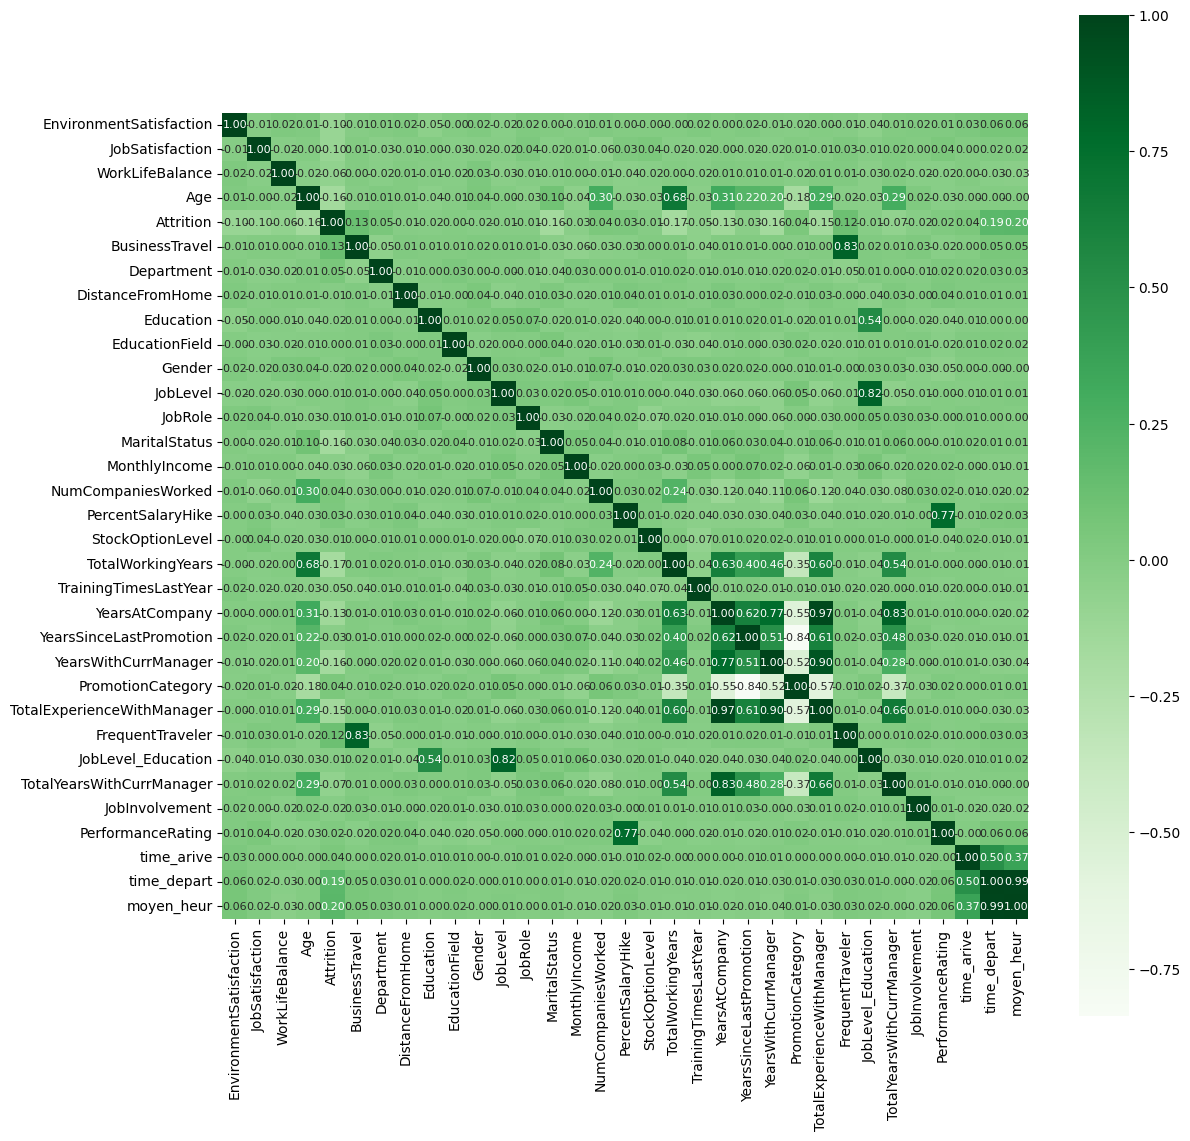

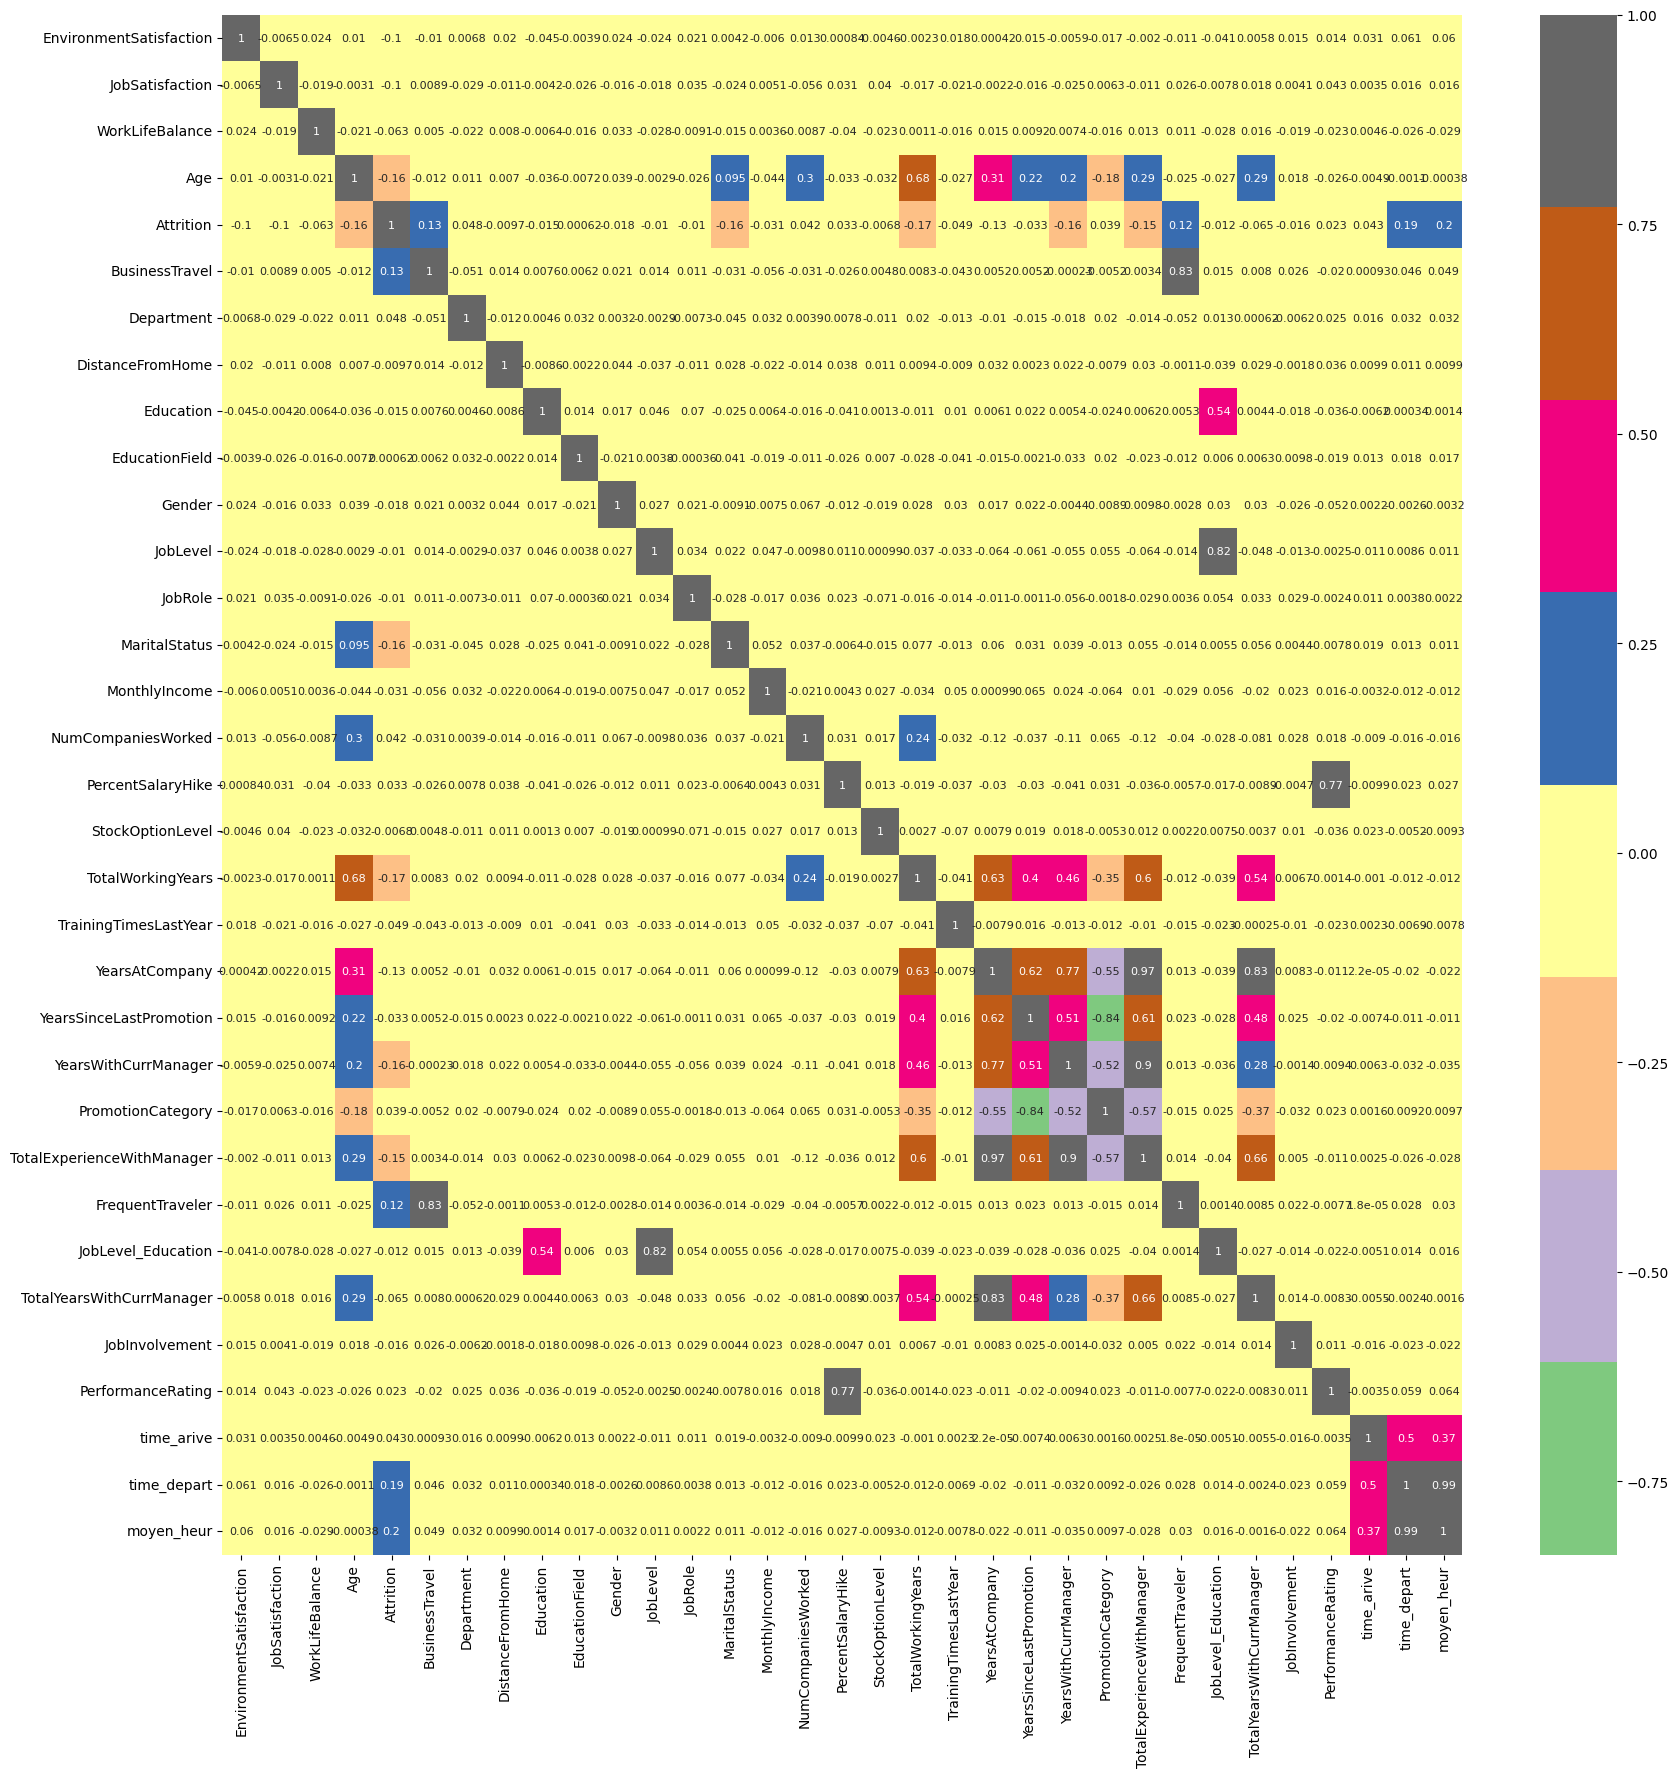

In [121]:
correlation = df_normalisee.corr()
 
plt.figure(figsize= (13,13))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Greens')

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap="Accent",annot_kws={"size": 8})

## 📜Conclusion

L'analyse de la matrice de corrélation a révélé que les variables liées au nombre d'années  sont fortement corrélées entre elles. En effet, l'augmentation de l'âge entraîne généralement une augmentation de ces autres variables.

 

## <b><span style='color:green'>4.2</span> |  RandomForestClassifier  </b>

In [37]:
from sklearn.model_selection import train_test_split

x = df_normalisee.drop(['Attrition'], axis=1)
y = df_normalisee['Attrition']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [38]:
x.shape

(4410, 32)

In [39]:
y.shape

(4410,)

In [40]:
# Model training
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

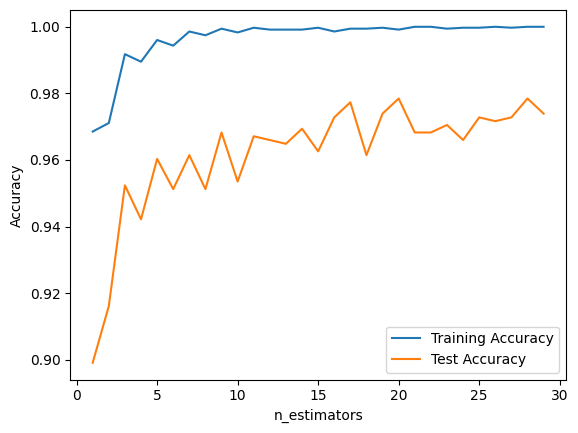

In [45]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

training_accuracy = []
test_accuracy = []
n_estimators_settings = range(1, 30)

for n_estimators in n_estimators_settings:
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(X_train, y_train)
    training_accuracy.append(rf.score(X_train, y_train))
    test_accuracy.append(rf.score(X_test, y_test))

plt.plot(n_estimators_settings, training_accuracy, label="Training Accuracy")
plt.plot(n_estimators_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()
plt.show()


In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=25)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

accuracy_score_randomforest=accuracy_score(y_test, y_pred)

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [47]:
accuracy_score_randomforest

0.9761904761904762

In [48]:
df_predict=pd.DataFrame()
df_predict['reel']=y_test
df_predict['Prediction']=y_pred
df_predict.head(5)

,reel,Prediction
1172,0.0,0.0
3151,1.0,1.0
3475,0.0,0.0
674,1.0,1.0
3815,0.0,0.0


🗺️ Recall, Precision, and F1 score

In [49]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

 
model = RandomForestClassifier(random_state=30)

 
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)

 
print("Prediction:", y_train_pred)

 
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

Prediction: [0. 0. 0. ... 0. 0. 0.]


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [50]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9764453961456103
Recall: 0.8028169014084507
F1 Score: 0.881159420289855


🔍 🗝️Les résultats indiquent que le modèle est très précis, capable d'identifier correctement la plupart des cas positifs réels. Il est également performant pour minimiser les faux positifs, c'est-à-dire les cas où le modèle prédit un résultat positif alors qu'il est en réalité négatif.

In [51]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier  
 
model = RandomForestClassifier()

 
num_folds = 5  

 
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

 
scores = cross_val_score(model, x, y, cv=kf)
 
for fold_num, score in enumerate(scores, start=1):
    print(f'Fold {fold_num}: {score}')


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

Fold 1: 0.9750566893424036
Fold 2: 0.9784580498866213
Fold 3: 0.9784580498866213
Fold 4: 0.9841269841269841
Fold 5: 0.9829931972789115


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [52]:
print(f'Mean Cross-Validation Score: {scores.mean()}')

Mean Cross-Validation Score: 0.9798185941043084


## 🔍 En résumé:
🗝️ ces résultats suggèrent que le modèle fonctionne bien et est capable de généraliser correctement sur de nouvelles données. 

## <b><span style='color:green'>4.3</span> |  LogisticRegression  </b>

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()  

model.fit(X_train , y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

0.8492063492063492

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

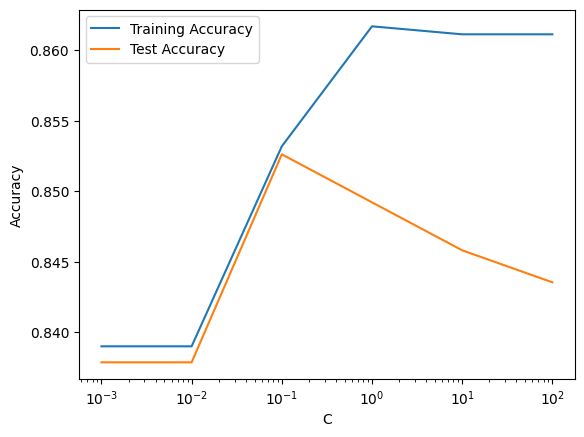

In [54]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

training_accuracy = []
test_accuracy = []
C_settings = [0.001, 0.01, 0.1, 1, 10, 100]

for C_value in C_settings:
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    training_accuracy.append(lr.score(X_train, y_train))
    test_accuracy.append(lr.score(X_test, y_test))

plt.plot(C_settings, training_accuracy, label="Training Accuracy", palette=green_palette)
plt.plot(C_settings, test_accuracy, label="Test Accuracy",palette=green_palette)
plt.xscale('log')  
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()
plt.show()

In [55]:
crossing_point_index = next(i for i, (train_acc, test_acc) in enumerate(zip(training_accuracy, test_accuracy)) if train_acc > test_acc)
crossing_point_index

0

In [56]:
model = LogisticRegression(C=0.07) 

model.fit(X_train , y_train)
y_pred = model.predict(X_test)
accuracy_score_logisticRegression=accuracy_score(y_test, y_pred)

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [57]:

accuracy_score_logisticRegression

0.8503401360544217

🗺️  Recall, Precision, and F1 score

In [58]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import precision_score, recall_score, f1_score

 
model = LogisticRegression(C=0.07) 

 
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)

 
print("Prediction:", y_train_pred)

 
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Prediction: [0. 0. 0. ... 0. 0. 0.]


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [59]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.7166666666666667
Recall: 0.07570422535211267
F1 Score: 0.13694267515923567


🔍 Les résultats montrent que le modèle ne fonctionne pas bien. Il ne détecte pas suffisamment les cas positifs (rappel faible) et sa précision est moyenne. Cela peut être dû à des paramètres de modèle mal choisis, à une sélection de fonctionnalités insuffisante ou à un déséquilibre dans les données.

## <b><span style='color:green'>4.4</span> |  KNN  </b>

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

KNeighborsClassifier()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

 


training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))



c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

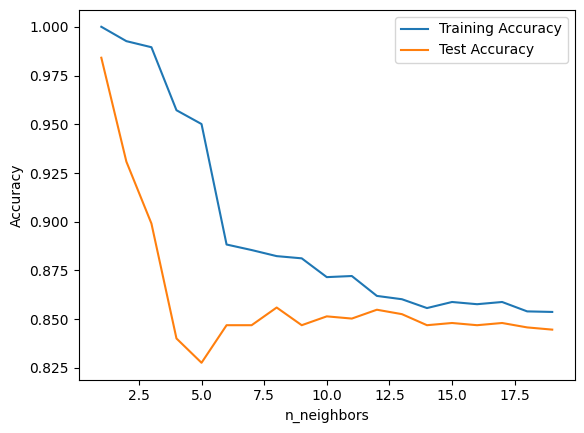

In [62]:

 
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

 
knn = KNeighborsClassifier(n_neighbors=8)
 
knn.fit(X_train, y_train)

 
y_pred = knn.predict(X_test)
 
accuracy_score_knn = accuracy_score(y_test, y_pred)

 
print("Accuracy:", accuracy_score_knn)

Accuracy: 0.8526077097505669


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=8)
 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
 
accuracy_score_knn = accuracy_score(y_test, y_pred)

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [65]:
accuracy_score_knn

0.8526077097505669

🗺️ Recall, Precision, and F1 score

In [66]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

model = KNeighborsClassifier(n_neighbors=6)

y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)

print("Prediction:", y_train_pred)

precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

Prediction: [0. 0. 0. ... 0. 0. 0.]


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [67]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6424870466321243
Recall: 0.21754385964912282
F1 Score: 0.32503276539973786


🔍 Les résultats indiquent que le modèle a du mal à bien performer, surtout en termes de rappel. Un rappel faible signifie que le modèle manque un grand nombre d'instances positives réelles. La précision n'est pas très élevée non plus, indiquant que parmi les prédictions positives, une proportion significative est incorrecte

## <b><span style='color:green'>4.5</span> | un arbre de décision  </b>

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [70]:
tree_model = DecisionTreeClassifier(random_state=42)

 
tree_model.fit(X_train, y_train)

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

DecisionTreeClassifier(random_state=42)

In [71]:
y_pred = tree_model.predict(X_test)
 
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle sur les données de test :", accuracy)

Précision du modèle sur les données de test : 0.9546485260770975


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [72]:
print("Précision du modèle sur les données de test :", accuracy)

Précision du modèle sur les données de test : 0.9546485260770975


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

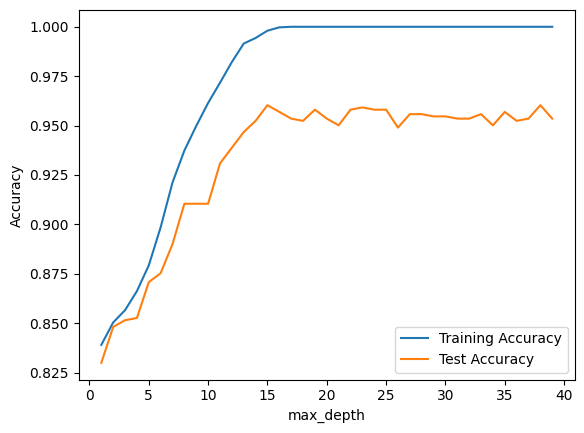

In [73]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

training_accuracy = []
test_accuracy = []
max_depth_settings = range(1, 40)

for max_depth_value in max_depth_settings:
    dt = DecisionTreeClassifier(max_depth=max_depth_value)
    dt.fit(X_train, y_train)
    training_accuracy.append(dt.score(X_train, y_train))
    test_accuracy.append(dt.score(X_test, y_test))

plt.plot(max_depth_settings, training_accuracy, label="Training Accuracy")
plt.plot(max_depth_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
plt.show()

In [74]:
tree_model = DecisionTreeClassifier(random_state=50)

tree_model.fit(X_train, y_train)
 
y_pred = tree_model.predict(X_test)
 
accuracy_DecisionTreeClassifier = accuracy_score(y_test, y_pred)

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [75]:
accuracy_DecisionTreeClassifier

0.9546485260770975

🗺️ Recall, Precision, and F1 score

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
 
from sklearn.metrics import precision_score, recall_score, f1_score

 
model = DecisionTreeClassifier(random_state=50)

 
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)

 
print("Prediction:", y_train_pred)

 
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

Prediction: [0. 0. 1. ... 0. 0. 0.]


c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Amira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [77]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8550458715596331
Recall: 0.8175438596491228
F1 Score: 0.8358744394618833


🔍 Les résultats montrent que votre modèle semble bien fonctionner, avec une précision, un rappel et un score F1 relativement élevés

 ## <b><span style='color:green'>4.6</span> | comparer </b>

In [78]:
import numpy as np

max_accuracy = [accuracy_score_logisticRegression, accuracy_DecisionTreeClassifier, accuracy_score_knn, accuracy_score_randomforest]
 
algorithm_names = ['Logistic Regression', 'Decision Tree Classifier', 'KNN', 'Random Forest']

 
max_index = np.argmax(max_accuracy)

 
algorithm_name_max = algorithm_names[max_index]

 
print(f"L'algorithme avec la valeur maximale de l'accuracy ({max(max_accuracy)}) est : {algorithm_name_max}")


L'algorithme avec la valeur maximale de l'accuracy (0.9761904761904762) est : Random Forest


🔍 Le modèle démontre une précision notable dans ses prédictions, avec des scores élevés pour la précision, le rappel et le score F1.

 ## <b><span style='color:green'>4.7</span> | Artificial Neural Network </b>

📈 visualiser ses valeurs

In [800]:
print("Noms des colonnes :", X_train.columns)

print("Première ligne de X_train :", X_train.iloc[0])

Noms des colonnes : Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalExperienceWithManager', 'FrequentTraveler', 'JobLevel_Education',
       'TotalYearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'time_arive', 'time_depart', 'moyen_heur', 'PromotionCategory_Récente'],
      dtype='object')
Première ligne de X_train : EnvironmentSatisfaction       0.333333
JobSatisfaction               1.000000
WorkLifeBalance               1.000000
Age                           0.476190
BusinessTravel                0.500000
Department                    0.500000
DistanceFromHome    

🗺 réseau de neurones dense (fully connected) avec trois couche

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
from tensorflow import keras

model_dense = keras.models.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),   
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=1, activation='sigmoid')  
])

model_dense.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_dense.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
 
history = model_dense.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/10


111/111 [==============================] - 7s 22ms/step - loss: 0.4510 - accuracy: 0.8279 - val_loss: 0.4077 - val_accuracy: 0.8401
Epoch 2/10
111/111 [==============================] - 2s 14ms/step - loss: 0.4105 - accuracy: 0.8370 - val_loss: 0.3907 - val_accuracy: 0.8401
Epoch 3/10
111/111 [==============================] - 1s 13ms/step - loss: 0.3908 - accuracy: 0.8421 - val_loss: 0.3831 - val_accuracy: 0.8390
Epoch 4/10
111/111 [==============================] - 1s 13ms/step - loss: 0.3827 - accuracy: 0.8424 - val_loss: 0.3768 - val_accuracy: 0.8526
Epoch 5/10
111/111 [==============================] - 1s 11ms/step - loss: 0.3845 - accuracy: 0.8495 - val_loss: 0.3747 - val_accuracy: 0.8492
Epoch 6/10
111/111 [==============================] - 1s 13ms/step - loss: 0.3722 - accuracy: 0.8509 - val_loss: 0.3715 - val_accuracy: 0.8549
Epoch 7/10
111/111 [==============================] - 1s 12ms/step - loss: 0.3587 - accuracy: 0.8586 - val_loss: 0.3695 - val_accuracy: 0

In [176]:
model_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12545 (49.00 KB)
Trainable params: 12545 (49.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🗺️ Évaluer le modèle sur l'ensemble de test

In [184]:

loss, accuracy = model_dense.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy : {accuracy}')


28/28 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8401
Loss: 0.45046278834342957, Accuracy : 0.8401360511779785


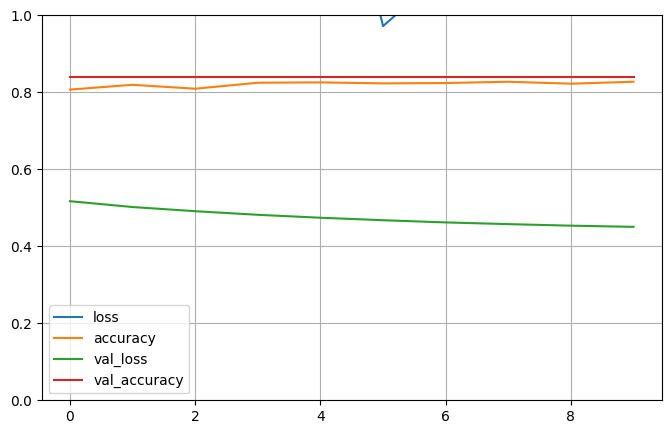

In [178]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

 ## <b><span style='color:green'>4.8</span> | un réseau de neurones convolutionnels (CNN)  </b>

In [44]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 

 
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
 
model_cnn = keras.models.Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

 
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
mod=model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))
model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))


Epoch 1/10
111/111 [==============================] - 8s 28ms/step - loss: 0.4575 - accuracy: 0.8362 - val_loss: 0.4346 - val_accuracy: 0.8401
Epoch 2/10
111/111 [==============================] - 2s 20ms/step - loss: 0.4225 - accuracy: 0.8384 - val_loss: 0.4228 - val_accuracy: 0.8401
Epoch 3/10
111/111 [==============================] - 2s 20ms/step - loss: 0.3921 - accuracy: 0.8401 - val_loss: 0.3997 - val_accuracy: 0.8447
Epoch 4/10
111/111 [==============================] - 2s 20ms/step - loss: 0.3746 - accuracy: 0.8438 - val_loss: 0.3953 - val_accuracy: 0.8537
Epoch 5/10
111/111 [==============================] - 2s 17ms/step - loss: 0.3581 - accuracy: 0.8552 - val_loss: 0.3849 - val_accuracy: 0.8503
Epoch 6/10
111/111 [==============================] - 2s 20ms/step - loss: 0.3460 - accuracy: 0.8557 - val_loss: 0.3886 - val_accuracy: 0.8481
Epoch 7/10
111/111 [==============================] - 2s 22ms/step - loss: 0.3388 - accuracy: 0.8557 - val_loss: 0.3802 - val_accuracy: 0.852

In [816]:
model_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 384)               0         
                                                                 
 dense_31 (Dense)            (None, 128)             

In [193]:
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f'Loss   : {loss}, Accuracy  : {accuracy}')

28/28 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8401
Loss   : 0.443642258644104, Accuracy  : 0.8401360511779785


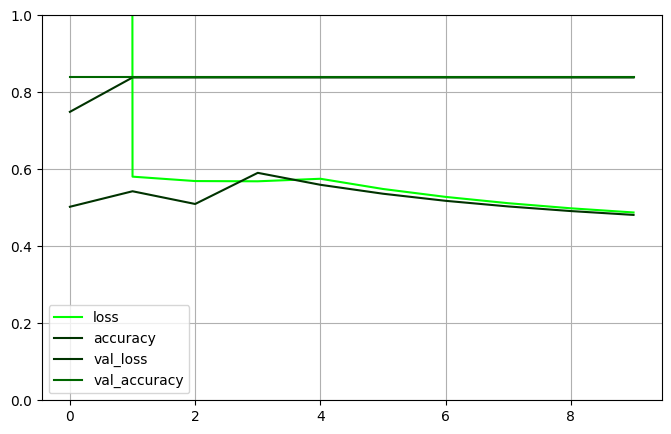

In [194]:
green_palette = ['#00FF00', '#003300', '#003300', '#006600', '#009900']
pd.DataFrame(mod.history).plot(figsize=(8, 5), color=green_palette)
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

on remarque que Accuracy de réseau de neurones dense (fully connected) avec trois couche  est plus elve que de  cnn 

 
 # <div style="color:white;display:fill;border-radius:5px;background-color:green;overflow:hidden;box-shadow:10px 10px 5px #EFEAE4;"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">Conclusion </p></div>

## 🎓 **Conclusion**

 

 

🌟L'étude a permis de mettre en évidence plusieurs facteurs contribuant à l'attrition des employés :

 L'âge et l'ancienneté  : les jeunes employés, en particulier ceux qui ont moins de 5 ans d'ancienneté, sont plus susceptibles de quitter l'entreprise. 
 Les voyages d'affaires  : les employés qui voyagent fréquemment sont plus susceptibles de quitter l'entreprise. 
 Les services  : le service des ressources humaines présente un taux d'attrition anormalement élevé. 
 



 

🌟 Même si les modèles prédictifs sont très précis, il est important de se rappeler que l'humain est toujours au centre de la solution. Il faut donc appliquer les recommandations avec une approche humaine, qui prend en compte les émotions et les besoins individuels de chaque employé

<div style="text-align:center; color:green; font-size:120%; margin-top: 25px; font-family: 'Playfair Display', serif;">
    <strong>Thank you </strong>
</div>

*by MOHAMMEDI Amira*